In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
raw_data_X = [[ 0.84775622,  0.81351748],
              [-0.26088393,  0.52012128],
              [ 1.61426071,  0.22008479],
              [-0.4869817,  0.66282523],
              [ 0.56475455,  0.03748871],
              [ 0.31576012, -2.0092352 ],
              [ 1.53814368, -1.32516266],
              [ 0.10334856, -1.01338448],
              [-0.60270149,  0.2201603 ],
              [ 0.4163702,  -0.68552103]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [19]:
print(raw_data_X,raw_data_y)

[[0.84775622, 0.81351748], [-0.26088393, 0.52012128], [1.61426071, 0.22008479], [-0.4869817, 0.66282523], [0.56475455, 0.03748871], [0.31576012, -2.0092352], [1.53814368, -1.32516266], [0.10334856, -1.01338448], [-0.60270149, 0.2201603], [0.4163702, -0.68552103]] [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [20]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

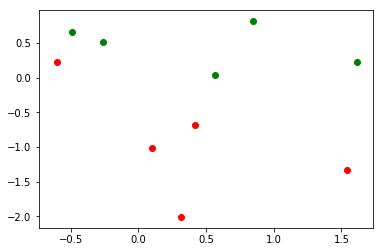

In [23]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r')

kNN 的过程

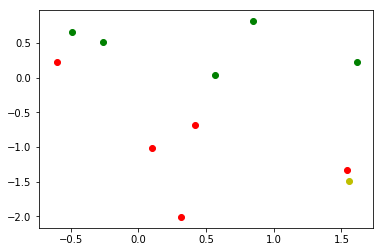

In [33]:
x = np.random.normal(size=[2])
x
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='y')

In [32]:
distances = []
for x_train in X_train:
    d = np.sqrt(np.sum((x_train - x)**2))
    distances.append(d)
distances

[1.6248189898252885,
 1.1705860321098838,
 1.7623277640800303,
 1.3810494130066544,
 0.81948545129569395,
 1.4264921760247748,
 1.6457637207847702,
 0.40965550151451419,
 1.0578850703000831,
 0.36733039254765654]

In [39]:
distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
distances

[2.4035536689541317,
 2.7055661903782715,
 1.7036520305152345,
 2.9640772354317244,
 1.8159603450662725,
 1.3494156273857256,
 0.15875189703189671,
 1.5286462743864557,
 2.7511782934267366,
 1.3925339615609786]

In [40]:
np.argsort(distances)

array([6, 5, 9, 7, 2, 4, 0, 1, 8, 3])

In [41]:
nearest = np.argsort(distances)

In [42]:
nearest

array([6, 5, 9, 7, 2, 4, 0, 1, 8, 3])

In [43]:
k = 6

In [45]:
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 0, 0]

In [51]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({0: 2, 1: 4})

In [59]:
votes.most_common(5)[0][0]

1

In [55]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

In [60]:
%run kNN_classify.py

In [66]:
print(kNN_classify(6, X_train, y_train, x))
kNN_classify(6, X_train, y_train, np.array([0.26088393,0.52012128]))

1


0

## sklearn 中的knn

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [77]:
knn.predict(x.reshape(1, -1))

array([1])